In [146]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [5]:
merged = pd.read_csv('data/outputs/merged.csv', index_col=0, parse_dates=['datetime'])
merged.head()

C:\Users\polan\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,datetime,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Section Labels
0,2319,28179463886,101,909714,1,0.79,427,0.0,119,15,0.0,0.0,2004-07-01 01:19:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
1,243,28197355878,102,909714,1,0.72,323,0.0,1011,15,0.0,0.0,2004-07-02 10:11:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
2,707,28210545743,103,909714,1,2.35,429,0.0,1119,15,0.0,0.0,2004-07-03 11:19:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
3,329,28210628714,103,909714,1,2.10,450,0.0,2037,15,0.0,0.0,2004-07-03 20:37:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
4,1029,28210676830,103,909714,1,0.81,329,0.0,1148,15,0.0,0.0,2004-07-03 11:48:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce


In [8]:
demo = pd.read_csv('data/outputs/demo.csv', index_col=0)

demo.head()

,household_key,age_45+,income_50K+,single_couple_family,has_kids,single,couple
0,1,1,0,2,0,0,1
1,7,1,1,2,0,0,1
2,8,0,0,3,1,0,0
3,13,0,1,3,1,0,0
4,16,1,1,1,0,1,0


In [25]:
# **** age description
older = list(demo[demo['age_45+']==1]['household_key'])
younger = list(demo[demo['age_45+']==0]['household_key'])

# **** income description
higher = list(demo[demo['income_50K+']==1]['household_key'])
lower = list(demo[demo['income_50K+']==0]['household_key'])


has_kids = list(demo[demo['has_kids']==1]['household_key'])
single = list(demo[demo['single']==1]['household_key'])
couple = list(demo[demo['couple']==1]['household_key'])


In [ ]:
targets = [[older, younger], [higher, lower], [single,couple, has_kids]] # list of lists

In [ ]:
def plot_demo_sales(merged, demo_list, colname='', resample_rule='M'):
    df = merged[merged['household_key'].isin(demo_list)].resample(resample_rule, on='datetime')['SALES_VALUE'].sum()
    
    plt.plot(df, label=colname)
    

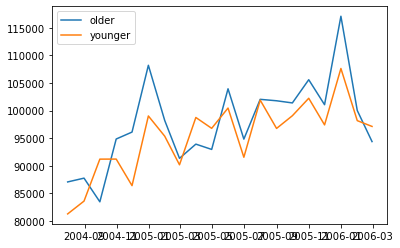

In [27]:
plt.Figure(figsize=(16,6))

for name, target in zip(['older', 'younger'], 
                       [older, younger]):
    plot_demo_sales(merged, target, colname=name)
    
plt.legend()
plt.show()

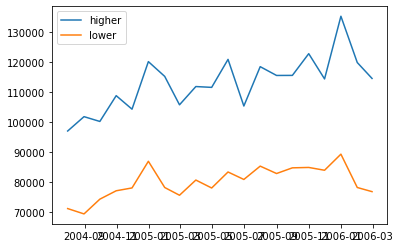

In [26]:
plt.Figure(figsize=(16,6))

for name, target in zip(['higher', 'lower'], 
                       [higher, lower]):
    plot_demo_sales(merged, target, colname=name)
    
plt.legend()
plt.show()

In [ ]:
plt.Figure(figsize=(16,6))

for name, target in zip(['single', 'couple', 'has_kids'], 
                       [single, couple, has_kids]):
    plot_demo_sales(merged, target, colname=name)
    
plt.legend()
plt.show()

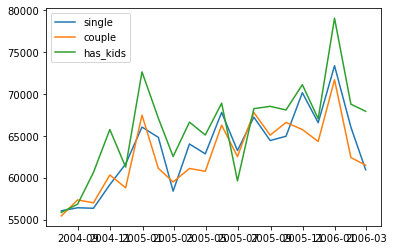

In [23]:
plt.Figure(figsize=(16,6))

for name, target in zip(['single', 'couple', 'has_kids'], 
                       [single, couple, has_kids]):
    plot_demo_sales(merged, target, colname=name)
    
plt.legend()
plt.show()

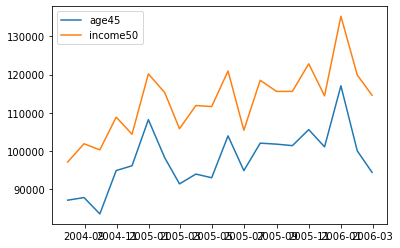

In [22]:
plt.Figure(figsize=(16,6))

for name, target in zip(['age45', 'income50'], 
                       [age45, income50]):
    plot_demo_sales(merged, target, colname=name)
    
plt.legend()
plt.show()

In [91]:
hh_agg = pd.read_csv('data/outputs/hh_agg.csv', index_col=0)

In [92]:
hh_agg.set_index('household_key')

,total_spend,total_loyalty,total_coupon,total_quantity,num_baskets,unique_products,first_purchase,last_purchase,avg_basket_spend,avg_item_cost,...,junk_food,kitchen,meat,misc,produce,seasonal,R,F,M,RFM
household_key,,,,,,,,,,,,,,,,,,,,,
243,4120.07,-642.14,-25.65,1901,81,655,101,706,50.865062,2.167317,...,764.02,1.59,379.04,303.82,477.82,0.00,4,1,4,9
707,1954.34,-333.50,0.00,833,45,545,103,668,43.429778,2.346146,...,255.63,7.98,277.78,139.88,212.41,6.99,1,1,3,5
329,2633.20,-667.59,-19.80,1589,46,513,113,703,57.243478,1.657143,...,508.39,0.00,814.45,198.42,261.44,1.99,3,1,4,8
1029,1200.11,-115.65,0.00,382,30,164,104,627,40.003667,3.141649,...,261.64,0.00,135.09,60.13,18.71,0.00,1,1,2,4
1975,695.32,-94.48,0.00,224,36,182,111,703,19.314444,3.104107,...,34.12,3.99,154.29,81.88,12.64,1.29,3,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,1409.96,-197.28,0.00,583,25,336,104,687,56.398400,2.418456,...,282.22,1.59,259.50,67.81,81.64,26.70,2,5,2,9
954,4309.24,-1046.35,-17.65,1991,113,877,116,704,38.134867,2.164360,...,700.32,2.99,878.13,300.28,332.41,0.00,3,4,4,11
650,2043.00,-427.91,-0.45,1125,50,550,103,682,40.860000,1.816000,...,381.77,0.00,469.72,164.51,197.10,0.00,2,3,3,8


,total_spend,total_loyalty,total_coupon,total_quantity,num_baskets,unique_products,first_purchase,last_purchase,avg_basket_spend,avg_item_cost,...,junk_food,kitchen,meat,misc,produce,seasonal,R,F,M,RFM
3,2633.20,-667.59,-19.80,1589,46,513,113,703,57.243478,1.657143,...,508.39,0.00,814.45,198.42,261.44,1.99,3,1,4,8
5,695.32,-94.48,0.00,224,36,182,111,703,19.314444,3.104107,...,34.12,3.99,154.29,81.88,12.64,1.29,3,1,2,6
6,5743.41,-817.96,-0.45,2391,241,803,118,707,23.831577,2.402095,...,406.29,14.85,1460.73,214.36,1342.74,17.44,4,2,5,11
11,33.39,-10.98,0.00,20,5,17,110,412,6.678000,1.669500,...,0.99,0.00,8.59,0.00,11.49,0.00,1,2,1,4
15,859.13,-136.95,0.00,390,51,205,123,705,16.845686,2.202897,...,42.53,1.00,76.51,28.52,193.43,0.00,4,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,2118.62,-462.34,0.00,1086,162,626,103,682,13.077901,1.950847,...,619.47,0.00,320.43,100.97,62.98,15.43,2,2,3,7
2182,1327.69,-185.18,0.00,630,73,352,103,699,18.187534,2.107444,...,232.82,2.39,360.60,66.40,161.75,0.00,3,1,2,6
2216,444.57,-69.01,0.00,236,33,122,106,694,13.471818,1.883771,...,65.62,0.00,69.11,45.41,69.72,0.00,2,2,1,5
2235,3433.85,-421.01,-0.80,1004,81,617,107,705,42.393210,3.420169,...,183.71,15.88,1166.87,265.23,292.20,3.67,4,2,4,10


# Single Couple Family

C:\Users\polan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\polan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


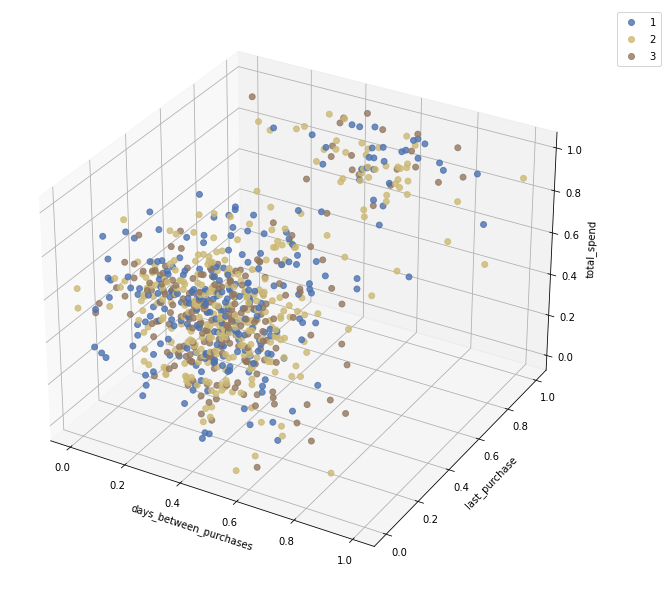

In [152]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# df = hh_agg[hh_agg['household_key'].isin(single)]
df = hh_agg.merge(demo)

# generate data
x = MinMaxScaler()
x = x.fit_transform(np.array(np.log(df['days_between_purchases'])).reshape(-1,1))
y = MinMaxScaler()
y = y.fit_transform(np.array(np.exp(df['last_purchase'])).reshape(-1,1))
z = MinMaxScaler()
z = z.fit_transform(np.array(np.log(df['total_spend'])).reshape(-1,1))

# axes instance
fig = plt.figure(figsize=(8,8))
ax.title = ('Single/Couple/Family [1,2,3]')
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("deep", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=35, c=df['single_couple_family'], marker='o', cmap=cmap, alpha=0.8)
ax.set_xlabel('days_between_purchases')
ax.set_ylabel('last_purchase')
ax.set_zlabel('total_spend')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
# plt.savefig("scatter_hue", bbox_inches='tight')
plt.show()

# Younger Older

In [ ]:
xs = np.log(hh_agg['num_baskets'])
ys = np.log(hh_agg['avg_basket_spend'])
zs = np.log(hh_agg['days_between_purchases'])

In [145]:
# df = hh_agg[hh_agg['household_key'].isin(single)]
df = hh_agg.merge(demo)

# generate data
x = StandardScaler()
x = x.fit_transform(np.array(df['num_baskets']).reshape(-1,1))
y = StandardScaler()
y = y.fit_transform(np.array(df['avg_basket_spend']).reshape(-1,1))
z = StandardScaler()
z = z.fit_transform(np.array(df['days_between_purchases']).reshape(-1,1))

# axes instance
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("deep", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=25, c=df['age_45+'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('num_baskets')
ax.set_ylabel('avg_basket_spend')
ax.set_zlabel('days_between_purchases')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

NameError: name 'StandardScaler' is not defined

### 3D PLOT FOR RFM

Create a plot with different coloured dots.
    -> the dots are different demographic variables

Plot the three RFM columns;
    -> days since purchase                     # 
    -> days between purchase                   # total purchases?
    -> total spend                            #avg. basket spend?
    

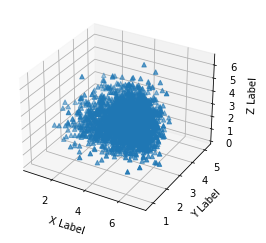

In [141]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs = np.log(hh_agg['num_baskets'])
ys = np.log(hh_agg['avg_basket_spend'])
zs = np.log(hh_agg['days_between_purchases'])
ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

##

In [38]:
hh_agg.columns

Index(['total_spend', 'total_loyalty', 'total_coupon', 'total_quantity',
       'num_baskets', 'unique_products', 'first_purchase', 'last_purchase',
       'avg_basket_spend', 'avg_item_cost', 'household_key',
       'days_between_purchases', 'alcohol', 'beverages', 'concessions',
       'dairy', 'drug', 'garden', 'grain_goods', 'grocery', 'home_family',
       'junk_food', 'kitchen', 'meat', 'misc', 'produce', 'seasonal', 'R', 'F',
       'M', 'RFM'],
      dtype='object')

In [40]:
hh_agg[['days_between_purchases', 'last_purchase', 'total_spend']]

,days_between_purchases,last_purchase,total_spend
1,3.63,706,4120.07
2,1.96,668,1954.34
3,4.28,703,2633.20
4,3.62,627,1200.11
5,2.42,703,695.32
...,...,...,...
2480,129.50,687,1409.96
2481,14.35,704,4309.24
2482,10.73,682,2043.00
2483,15.75,708,1765.91


In [59]:
from sklearn.preprocessing import MinMaxScaler

C:\Users\polan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\polan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


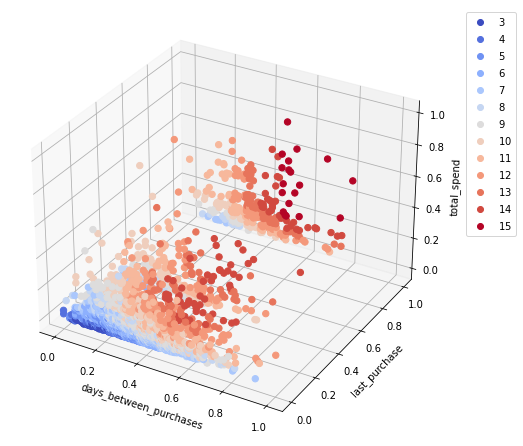

In [71]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
x = MinMaxScaler()
x = x.fit_transform(np.array(np.log(hh_agg['days_between_purchases'])).reshape(-1,1))
y = MinMaxScaler()
y = y.fit_transform(np.array(np.exp(hh_agg['last_purchase'])).reshape(-1,1))
z = MinMaxScaler()
z = z.fit_transform(np.array(hh_agg['total_spend']).reshape(-1,1))

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("coolwarm", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=hh_agg['RFM'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('days_between_purchases')
ax.set_ylabel('last_purchase')
ax.set_zlabel('total_spend')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [74]:
hh_agg['last_purchase'].describe()

count    2469.000000
mean      684.060348
std        52.112761
min       179.000000
25%       689.000000
50%       702.000000
75%       706.000000
max       708.000000
Name: last_purchase, dtype: float64